## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#--> Reading data from csv file
df = pd.read_csv('Transformed Data Set - Sheet1.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


## ----------Data Preprocessing part----------

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [4]:
df['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [5]:
len(df['Favorite Music Genre'].unique().tolist())

7

In [6]:
df['Favorite Beverage'].unique()

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [7]:
df['Favorite Soft Drink'].unique()

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

In [8]:
temp1 = pd.get_dummies(df['Favorite Music Genre'])
temp1

,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
61,0,0,0,0,0,0,1
62,0,0,1,0,0,0,0
63,0,0,1,0,0,0,0
64,0,0,0,0,0,0,1


In [9]:
temp2 = pd.get_dummies(df['Favorite Soft Drink'])
temp2

,7UP/Sprite,Coca Cola/Pepsi,Fanta,Other
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
61,0,1,0,0
62,0,1,0,0
63,0,0,1,0
64,0,1,0,0


In [10]:
temp3 = pd.get_dummies(df['Favorite Beverage'])
temp3

,Beer,Doesn't drink,Other,Vodka,Whiskey,Wine
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
61,0,0,0,1,0,0
62,1,0,0,0,0,0
63,0,1,0,0,0,0
64,0,0,0,0,0,1


In [11]:
temp4 = pd.get_dummies(df['Favorite Color'])
temp4

,Cool,Neutral,Warm
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
61,1,0,0
62,1,0,0
63,0,1,0
64,1,0,0


In [12]:
df0 = pd.concat([temp1, temp2, temp3, temp4], axis = 1)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Electronic        66 non-null     uint8
 1   Folk/Traditional  66 non-null     uint8
 2   Hip hop           66 non-null     uint8
 3   Jazz/Blues        66 non-null     uint8
 4   Pop               66 non-null     uint8
 5   R&B and soul      66 non-null     uint8
 6   Rock              66 non-null     uint8
 7   7UP/Sprite        66 non-null     uint8
 8   Coca Cola/Pepsi   66 non-null     uint8
 9   Fanta             66 non-null     uint8
 10  Other             66 non-null     uint8
 11  Beer              66 non-null     uint8
 12  Doesn't drink     66 non-null     uint8
 13  Other             66 non-null     uint8
 14  Vodka             66 non-null     uint8
 15  Whiskey           66 non-null     uint8
 16  Wine              66 non-null     uint8
 17  Cool              66 non-null     uin

In [13]:
df['Gender'].unique().tolist()

['F', 'M']

In [14]:
df['Gender'] = df['Gender'].apply(lambda x : df['Gender'].unique().tolist().index(x))

## ------ Getting data into array to train model ------

In [15]:
X = df0.iloc[:, 0:].values
X.shape

(66, 20)

In [16]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## --------- Model loading from sklearn library ----------

In [17]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## ---------- Training model one after another to check best fit model ----------

In [18]:
classifier = LogisticRegressionCV(cv = 10)

In [19]:
classifier.fit(X, y)

LogisticRegressionCV(cv=10)

In [20]:
classifier.score(X, y)

0.7121212121212122

In [21]:
classifier = DecisionTreeClassifier()

In [22]:
classifier.fit(X, y)

DecisionTreeClassifier()

In [23]:
classifier.score(X, y)

0.9545454545454546

In [24]:
classifier = GaussianNB()

In [25]:
classifier.fit(X, y)

GaussianNB()

In [26]:
classifier.score(X, y)

0.7121212121212122

In [27]:
classifier = KNeighborsClassifier()

In [28]:
classifier.fit(X, y)

KNeighborsClassifier()

In [29]:
classifier.score(X, y)

0.7878787878787878

In [30]:
classifier = RandomForestClassifier()

In [31]:
classifier.fit(X, y)

RandomForestClassifier()

In [32]:
classifier.score(X, y)

0.9545454545454546

## ------ After Evaluation RandomForestClassifier is best so let's choose it ------

In [33]:
classifier = RandomForestClassifier()

In [34]:
classifier.fit(X, y)

RandomForestClassifier()

In [35]:
y_pred = classifier.predict(X)

In [36]:
classifier.score(X, y)

0.9545454545454546

## --------- Confusion Metrix to evaluate model -----------

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y, y_pred)
print(cm)

[[32  1]
 [ 2 31]]


## --------- Clustering ----------

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering

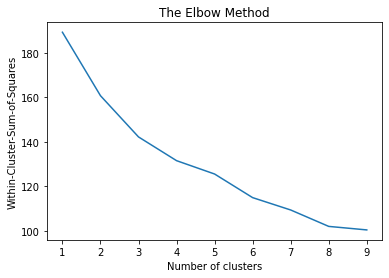

In [38]:
wcss = []
for i in range(1, 10):
    model = KMeans(n_clusters = i)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

In [39]:
model = KMeans(n_clusters= 2, n_jobs= -1)


In [40]:
y_prec = model.fit_predict(X)

/home/smit/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


## ------ To visualise this let's reduce dataset dimensionality with PCA---------

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [42]:
Z = pca.fit_transform(X)

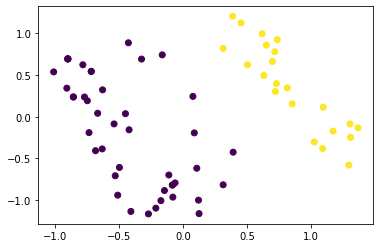

In [43]:
plt.scatter(Z[:, 0], Z[:, 1], c=y_prec)

In [44]:
pca_3d = PCA(n_components=3)
Z_3d = pca_3d.fit_transform(X)

<IPython.core.display.Javascript object>


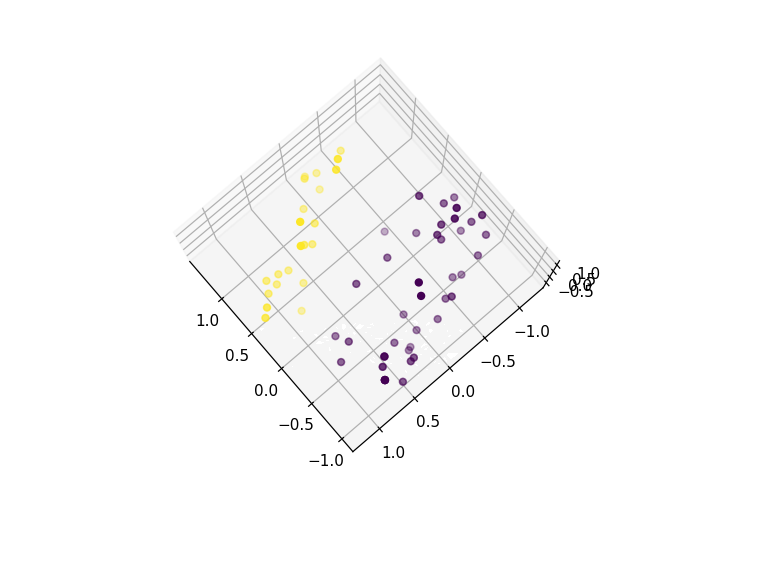

In [45]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_3d[:, 0], Z_3d[:, 1], Z_3d[:, 2], c=y_prec)
plt.show()